In [ ]:
import json
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import f1_score


In [ ]:
class Section:
    CLOTHING = "CLOTHING"
    GROCERY = "GROCERY"
    


class Attributes:
    def __init__(self, section, text):
        self.section = section
        self.text = text
        

class Container:
    def __init__(self, reviews):
        self.reviews = reviews
    
    def get_text(self):
        return [x.text for x in self.reviews]
    
    def get_x(self, vectorizer):
        return vectorizer.transform(self.get_text())
    
    def get_section(self):
        return [x.section for x in self.reviews]

        

In [3]:
file_names = ['Clothing_small.json','Grocery_small.json']
sections = [Section.CLOTHING, Section.GROCERY]

reviews = []
for i in range(len(file_names)):
    file_name = file_names[i]
    section = sections[i]
    with open(file_name) as f:
        for line in f:
            review_json = json.loads(line)
            review = Attributes(section, review_json['reviewText'])
            reviews.append(review)
            

In [4]:
train, test = train_test_split(reviews, test_size = 0.20, random_state=42)
train_container = Container(train)
test_container = Container(test)


corpus = train_container.get_text()
vectorizer = TfidfVectorizer()
vectorizer.fit(corpus)

train_x = train_container.get_x(vectorizer)
train_y = train_container.get_section()

test_x = test_container.get_x(vectorizer)
test_y = test_container.get_section()

 #### MODEL SVM 

In [5]:
from sklearn import svm

clf = svm.SVC(C=16, kernel='linear', gamma='auto')
clf.fit(train_x, train_y)
print(clf.score(test_x, test_y))

0.955


In [6]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()


nb.fit(train_x.todense(),train_y)
nb.score(test_x.todense(),test_y)

0.925

In [8]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(train_x, train_y)



dt.score(test_x,test_y)

0.845

In [9]:
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':('linear', 'rbf'), 'C':[0.1,1,8,16,32]}
svc = svm.SVC()
clf_ = GridSearchCV(svc, parameters, cv=5)
clf_.fit(train_x, train_y)



GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 8, 16, 32], 'kernel': ('linear', 'rbf')})

In [10]:
clf.score(test_x, test_y)

0.955

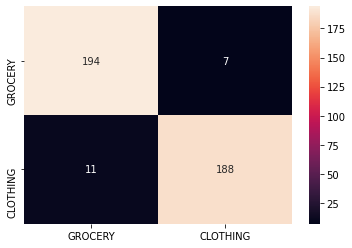

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib as plt

y_pred = clf.predict(test_x)

labels = [Section.GROCERY, Section.CLOTHING]

cm = confusion_matrix(test_y, y_pred, labels=labels)
df_cm = pd.DataFrame(cm, index=labels, columns=labels)

sn.heatmap(df_cm, annot=True, fmt='d')
